In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import pandas as pd

In [3]:
import sqlite3

cxn = sqlite3.connect('f:\dev\dataplayground\zillow.db')
c = cxn.cursor()

In [5]:
import_sql = "select * from listings"
c.execute(import_sql)
all_data = np.array(c.fetchall())

In [6]:
df_xy = pd.DataFrame(all_data)
df_xy.columns = ['listID', 'address', 'price', 'bedrooms', 'bathrooms', 'square_feet', 'city', 'zipcode', 'state', 'lat', 'lon']
df_xy = df_xy.astype({'price': 'float64', 'bedrooms': 'uint8', 'bathrooms': 'uint8', 'square_feet': 'uint32', 'lat': 'float64', 'lon': 'float64'})
df_xy

,listID,address,price,bedrooms,bathrooms,square_feet,city,zipcode,state,lat,lon
0,2,1200 Matamoros St,179900.0,3,2,1627,Mission,78572,TX,26.208348,-98.314673
1,3,3303 Santa Erica St,249000.0,4,4,3066,Mission,78572,TX,26.170369,-98.303401
2,4,1406 Colosios,305000.0,4,5,3324,Mission,78572,TX,26.189323,-98.310773
3,5,1001 Burney St,130000.0,3,2,1806,Mission,78572,TX,26.218622,-98.337284
4,6,1206 Flamingo Ave,170000.0,4,3,2808,Mission,78572,TX,26.212690,-98.287002
5,7,1807 Tierra Dorada Blvd,135500.0,3,2,1318,Mission,78572,TX,26.210409,-98.347892
6,8,2013 Peace Ave,119900.0,4,2,1745,Mission,78572,TX,26.226704,-98.328535
7,9,1201 Lucksinger Rd,189000.0,3,4,2268,Mission,78572,TX,26.214209,-98.296406
8,10,2213 Hackberry,279850.0,4,3,3292,Mission,78572,TX,26.221374,-98.281256
9,11,2402 San Alejandro,479000.0,6,7,5484,Mission,78572,TX,26.176015,-98.304481


In [7]:
from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor, SpatialDataFrame

In [17]:
sedf = GeoAccessor.from_xy(df_xy, 'lon', 'lat')
sedf['lat']

0       26.208348
1       26.170369
2       26.189323
3       26.218622
4       26.212690
          ...    
1187    26.451996
1188    26.451996
1189    26.451996
1190    26.451996
1191    26.451996
Name: lat, Length: 1192, dtype: float64

In [9]:
import keys

In [10]:
gis = GIS("https://www.arcgis.com",keys.arcgislogin['username'], keys.arcgislogin['password'])
item = gis.content.get("a7b8c5cce8d0427183f0ceee19d727a3")

In [11]:
map1 = gis.map("McAllen, TX")

In [12]:
map1

MapView(layout=Layout(height='400px', width='100%'))

In [13]:
map2 = gis.map("McAllen, TX")
map2

MapView(layout=Layout(height='400px', width='100%'))

In [15]:
map1.basemap = 'gray'
sedf.spatial.plot(map_widget=map1, renderer_type='h')

NameError: name 'sedf' is not defined

In [14]:
map2.basemap = 'gray'
dfint.spatial.plot(map_widget=map2, renderer_type='h')

NameError: name 'dfint' is not defined

In [16]:
price_map = gis.map("McAllen, TX")

In [19]:
price_map.basemap = 'gray'
price_map

MapView(layout=Layout(height='400px', width='100%'))

In [20]:
sedf.spatial.plot(map_widget = price_map,
                  renderer_type='c',
                 method='esriClassifyQuantile', 
                 class_count = 10,
                col='price',
                cmap='summer',
                alpha=0.5,
                outline_color=[50,0,0,50], line_width = 1)

True

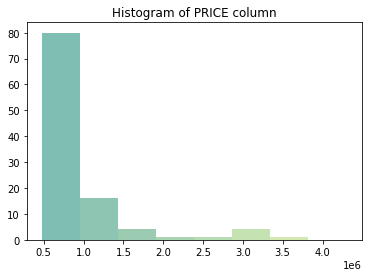

In [21]:
price_class_breaks = price_map.layers[0].layer.layerDefinition.drawingInfo.renderer.classBreakInfos
cbs_list = []
cmap_list = []
for cb in price_class_breaks:
#     print(cb.description)  # print the class break labels
    cbs_list.append(cb.classMaxValue)
    cmap_list.append([x/255.0 for x in cb.symbol.color])
    
# build a histogram for the same class breaks
n, bins, patches = plt.hist(sedf['price'], bins=cbs_list)

# apply the same color for each class to match the map
idx = 0
for c, p in zip(bins, patches):
    plt.setp(p, 'facecolor', cmap_list[idx])
    idx+=1

plt.title('Histogram of PRICE column')
plt.ticklabel_format(style="sci", axis="x", scilimits=(0,0))

In [126]:
sedf = sedf.astype({'price': 'uint16', 'bedrooms': 'uint32', 'bathrooms': 'uint32', 'square_feet': 'uint32'})